In [20]:
%matplotlib inline

In [21]:
from IPython.display import YouTubeVideo, Image

# Problem Set 2

## Directions

1. Show all work/steps/calculations. Your submission should be a zip file named according to your JHED id ` <JHED>.zip` with the following contents:
    1. the .ipynb version of the notebook.
    2. the database, `contracts.sqlite`
    3. your ETL code as `contracts.py`
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.**

## Question 1 - Bad Charts

**Part 1.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What are the chief problems with the following chart (what visualization principles does it violate)?
2. Present an alternative.

In [22]:
Image(url="http://skepchick.org/wp-content/uploads/2015/06/CNN-weed-chart.jpg")

This is actually the same picture I used in my group discussion. 

1) The total percent is obviously over 100%. 

2) The chart seems like a pie chart to show the percent of each age group to the total population. 
    However, after I looked into it deeply, it actually shows the percent of people who have tried weed under each age group. 
    Using a pie-chart like chart to show those percent values is very confusing. 
    
3) I think it violate Ware's principles, as we have only limited ability to perceive differences in sizes and colors. For example the 36% and 17% look pretty similar to me. Also, it’s hard to tell the difference among those colors. 

4) I dont think it violates Clevanland's principle. It's not hard to decode it to quantitative values.

5) I think below chart is a better choice. 


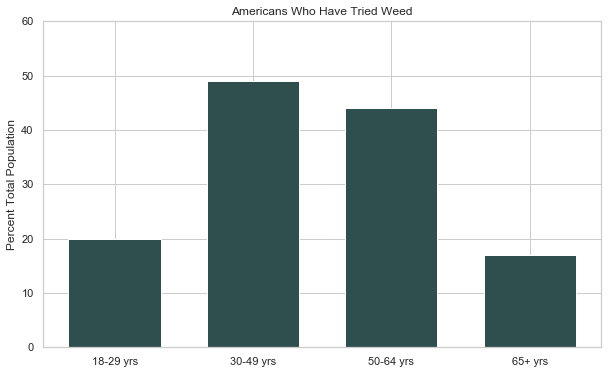

In [23]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

from IPython.display import YouTubeVideo, Image

THEME = "darkslategray"
percent = [20, 49, 44, 17]
age = ["18-29 yrs", "30-49 yrs", "50-64 yrs", "65+ yrs"]
width = 1/1.5

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.set_title( "Americans Who Have Tried Weed")
axes.bar(range(0, len(percent)), percent, width, color=THEME, align="center")
axes.set_xticks(range(0, len(percent)))
axes.set_xticklabels(age)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 60))
axes.set_ylabel( "Percent Total Population")

rects = axes.patches    
plt.show()

**Part 2.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What are the chief problems with the following chart (what visualization principles does it violate)?
2. Present an alternative(s). Make whatever assumptions you need to make but explain them.

In [24]:
Image(url="http://www.essexrecordofficeblog.co.uk/wp-content/uploads/2015/01/Death-pie-chart.jpg")

1) I think it adheres to Clevanland's principle. The description and the quantitative numbers help us decode the chart.     

2) I think it violates Ware's principles, as we have only limited ability to perceive differences in angels or sizes.    

3) I think below chart is a better alternative. It clearly tells the trend by age group. 

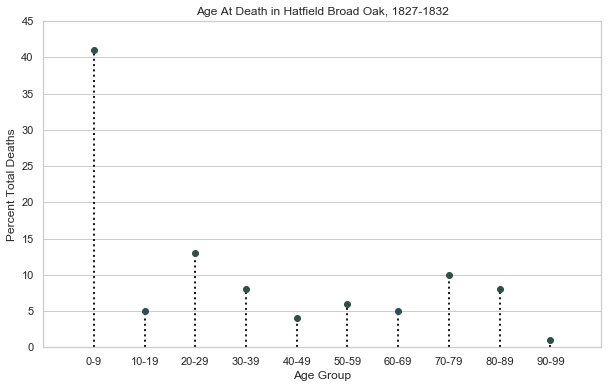

In [25]:
xs = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
ys = [41, 5, 13, 8,4,6,5,10,8,1]

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.set_title( "Age At Death in Hatfield Broad Oak, 1827-1832")
axes.plot(xs, ys, "o", color=THEME)
axes.vlines(xs, [0], ys, linestyles='dotted', lw=2)
axes.set_xticks(xs)
axes.set_xlim((-1, 10))
axes.set_ylim((0, 45))
axes.xaxis.grid(False)
axes.set_ylabel( "Percent Total Deaths")
axes.set_xlabel( "Age Group")

 
plt.show()

## Question 2 - Obtaining and Querying Data

In Lab 4, we obtained data from a Wikipedia page. This time we're going to start with a Wikipedia page but obtain and transform the supporting data.

1. View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).
2. If you follow footnote 6, you can obtain the raw data for FY2015 which is an Excel file. The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs are by department and we are only interested in *departments* not sub departments. A department will have a code that ends with "00". For example, "9700" is the Defense Department but "9761" is "Defense Threat Reduction". We're not interested in the latter.
3. Create a SQLite3 database, `contracts.sqlite`, of the department specific actions (contracts) and dollar amounts. It should have **two** tables. The first, "contractors", should have an id (as a primary key) and a global_vendor_name (as a varchar). The second, "actions", should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table. **Submit your database along with any support files (to create the tables) along with this notebook.**
4. Reading the Excel file and creating the database should be automated with no cutting and pasting so that you could regenerate the database for a corrected file or for FY2016 (assuming it had the same format). Both `xlrd` and `openpyxl` are included in Anaconda. (Translating the file from .xls to .xlsx *is* permitted but may not be required). You may place this "ETL" code in a separate `contracts.py` file and include it with your submission.
5. After generating the database, connect to it and answer the 3 questions.

In [26]:
## Run the ETL code and have the database ready!  

import contracts

%run ./contracts.py


Done!


1. What are the total actions and dollars obligated by department?
2. What is Johns Hopkins University's number of actions and dollars by department?
3. How many vendors received contracts from 1 department, 2 departments, etc? In other words, I want a table that looks like the following (numbers are absolutely made up):

| # Departments | Vendors |
|-------------|-----------|
| 1           | 1238      |
| 2           | 525       |
| 3           | 275       |
| ...         |           |
| n           | 2         |

Interpret the first two rows in words. What is the overall story? Now, using *percentages* (instead of these raw counts), make a chart that shows this story using the principles explored in class.

# What are the total actions and dollars obligated by department?

To answer this question, we need to sum the actions and dollars grouping by the department. We also need to exclude the dollars and actions of the Federal. 

I use --actions.Department!="Federal"-- to exclude the federal govement
I use --groupby(["Department"])[["Department","actions","dollars"]].sum()-- to calculate the actions and dollars obligated by department

In [27]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("contracts.db")
actions = pd.read_sql_query("select * from actions;", conn)

#1. What are the total actions and dollars obligated by department?
actions.loc[actions.Department!="Federal"].groupby(["Department"])[["Department","actions","dollars"]].sum()

,actions,dollars
Department,,
(GSA) 4700,47825,5.961147e+09
Agriculture (1200),9621,3.652094e+09
Air Force (5700),42409,4.218775e+10
Army (2100),43827,4.491044e+10
Commerce (1300),5857,2.115698e+09
DoD (9700),7139909,1.751856e+11
EPA (6800),9115,1.128402e+09
Education (9100),1844,2.567376e+09
Energy (8900),4335,2.394702e+10


# What is Johns Hopkins University's number of actions and dollars by department?

1. To get Johns Hopkins's actions and dollars, we need to add a condition on the vendor name.
2. To have the result by department, we need to use the groupby function 

In [28]:
contractors = pd.read_sql_query("select * from contractors;", conn)
contractors.head()
contractors.loc[contractors.global_vendor_name.str.contains("JOHNS HOPKINS UNIVERSITY")]

,id,global_vendor_name
55,55,JOHNS HOPKINS UNIVERSITY


In [29]:
actions = pd.read_sql_query("select * from actions;", conn)

actions.loc[actions.contractor_id==55].groupby(["Department"])[["Department","actions","dollars"]].sum()

,actions,dollars
Department,,
DoD (9700),1536,7.610237e+08
Federal,2306,1.042574e+09
Health & Human Services (7500),238,3.896801e+07
NASA (8000),425,2.140475e+08
Navy (1700),959,5.494998e+08


# How many vendors received contracts from 1 department, 2 departments, etc? Interpret the first two rows in words. What is the overall story? 

I get the result in 3 steps: 
    (1) I need to get all the distinct combination of department and vendors, regarless of the actions and dollars. 
    (2) I need to calculate the count by vendors --> A
    (3) I transform the matrix A to get the # of vendors by count of the department 

1. There are 1102 vendors received contract from only 1 department (excluding the Federal government) 
2. There are 122 vendors received contract from 2 different departments 


In [30]:
actions_noFederal = actions.loc[actions.Department!="Federal"]
contractor_id_department_count = actions_noFederal[["Department","contractor_id"]].groupby(["contractor_id"]).agg(['count'])
contractor_id_department_count.columns =["departments"]
contractor_id_department_count["contractor_id"] = contractor_id_department_count.index
contractor_id_department_count.groupby(["departments"]).agg(['count'])


,contractor_id
,count
departments,
1,1120
2,122
3,44
4,26
5,13
6,11
7,8
8,9


# Now, using percentages (instead of these raw counts), make a chart that shows this story using the principles explored in class.

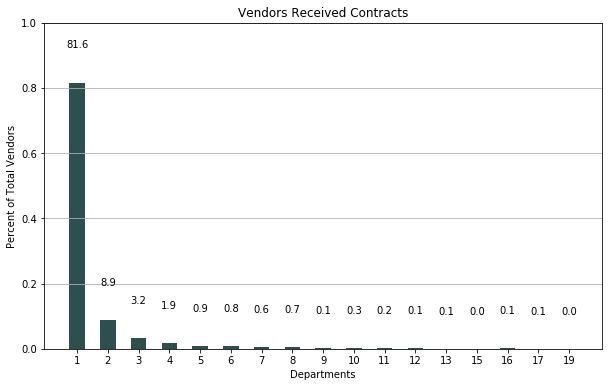

In [35]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt


contractor_id_department_counts = contractor_id_department_count.groupby(["departments"]).agg(['count'])

contractor_id_department_counts.columns =["Vendors"]
total_vendors = contractor_id_department_counts.sum()[0]
contractor_id_department_counts["Vendors"] =  contractor_id_department_counts["Vendors"] /total_vendors


THEME = "darkslategray"

contractor_id_department_counts.loc[15] = 0 
contractor_id_department_counts.loc[19] = 0 

contractor_id_department_counts = contractor_id_department_counts.sort_index()

percent = contractor_id_department_counts["Vendors"]
departments =  contractor_id_department_counts.index
width = 1/2

figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.set_title( "Vendors Received Contracts")
axes.bar(range(0, len(percent)), percent, width, color=THEME, align="center")
axes.set_xticks(range(0, len(percent)))
axes.set_xticklabels(departments)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 1))
axes.set_ylabel( "Percent of Total Vendors")
axes.set_xlabel( "Departments")

rects = axes.patches

# Make some labels.
labels = round(percent*100,1)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width() / 2, height + 0.1, label,
            ha='center', va='bottom')
    
plt.show()